In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [ ]:
#download mnist data
(X_train, y_train), (X_test, y_test) = mnist.load_data()


11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
test_image = X_test[:5]

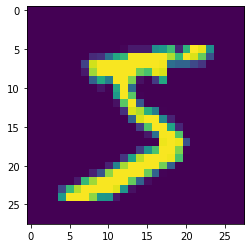

In [ ]:
#show image
plt.imshow(X_train[0])

In [ ]:
#shape 1 image
X_train[0].shape

(28, 28)

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
X_test.shape

(10000, 28, 28)

In [ ]:
#reshape data to fit model
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

In [ ]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [ ]:
#one-hot encoder target
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [ ]:
#create model
model = Sequential()
#add layer
#lop convluation 1
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1))) #Gom 64 bo loc, filer maxtrix 3x3
model.add(MaxPooling2D(2,2))#maxpooling voi matran 2x2
model.add(Dropout(0.25))
#lop convluation 2
model.add(Conv2D(128, kernel_size=3, activation='relu')) #Gom 64 bo loc, filer maxtrix 3x3
model.add(MaxPooling2D(2,2))#maxpooling voi matran 2x2
model.add(Dropout(0.25))
model.add(Flatten())
#dua vao mang ANN
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 128)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 3200)              0

In [ ]:
from google.colab import drive
drive.mount('/content/gdrvie', force_remount=True)

Mounted at /content/gdrvie


In [ ]:
%cd '/content/drive/My Drive/LDS8_Le Quang Anh Tu/week2/Chapter4'

/content/drive/My Drive/LDS8_Le Quang Anh Tu/week2/Chapter4


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
callbacks = [EarlyStopping(monitor='val_loss', patience=20),
             ModelCheckpoint('model_mnist_checkpoint_new.h5', save_best_only=True)]

In [ ]:
#compile model using accuracy
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#train model
model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=50, batch_size=256, callbacks=callbacks)

Epoch 1/50
235/235 [==============================] - 6s 24ms/step - loss: 1.8563 - accuracy: 0.7657 - val_loss: 0.0993 - val_accuracy: 0.9702
Epoch 2/50
235/235 [==============================] - 5s 22ms/step - loss: 0.1816 - accuracy: 0.9472 - val_loss: 0.0568 - val_accuracy: 0.9820
Epoch 3/50
235/235 [==============================] - 5s 22ms/step - loss: 0.1248 - accuracy: 0.9629 - val_loss: 0.0513 - val_accuracy: 0.9833
Epoch 4/50
235/235 [==============================] - 5s 22ms/step - loss: 0.1009 - accuracy: 0.9697 - val_loss: 0.0393 - val_accuracy: 0.9880
Epoch 5/50
235/235 [==============================] - 5s 22ms/step - loss: 0.0888 - accuracy: 0.9732 - val_loss: 0.0370 - val_accuracy: 0.9883
Epoch 6/50
235/235 [==============================] - 5s 22ms/step - loss: 0.0812 - accuracy: 0.9764 - val_loss: 0.0387 - val_accuracy: 0.9883
Epoch 7/50
235/235 [==============================] - 5s 22ms/step - loss: 0.0738 - accuracy: 0.9772 - val_loss: 0.0392 - val_accuracy: 0.9885

In [ ]:
#luu model
model.save('my_mnist_model_CNN_new.h5')
print('save')


save


In [ ]:
#show predict
result = model.predict(X_test[:5])
result.round()

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
#show actual
y_test[:5]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
#load model
from tensorflow.keras.models import load_model
classifier = load_model('my_mnist_model_CNN_new.h5')

In [ ]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 128)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 3200)              0